In [1]:
!pwd

/home/jovana/code/y01a-BG/NeuroPredict/notebooks


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sktime.classification.kernel_based import RocketClassifier

In [4]:
import sys
# Add the directory containing the EEG package to sys.path
sys.path.append('/home/jovana/code/y01a-BG/NeuroPredict/EEG')
import os
import pandas as pd
import numpy as np

#from random_predict_data_00.py import random_samples_data
from preprocessor_01 import preprocess_data
from X_y_test_train_02 import test_train_split_save
from encoding_03 import encoder_LSTM
from modeling_04 import initialize_lstm_model, compile_lstm_model
from training_05 import train_lstm_model
# from evaluating_06 import evaluate_lstm
# #from predictor_07 import pred_lstm


2025-03-24 17:37:42.558735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-24 17:37:42.928652: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 17:37:42.943863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-24 17:37:42.943904: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [5]:
input_path = "/home/jovana/code/y01a-BG/NeuroPredict/raw_data"
file_name = "Epileptic Seizure Recognition.csv"
file_path = os.path.join(input_path, file_name)

output_path = "/home/jovana/code/y01a-BG/NeuroPredict/processed_data"
data_file = "data.csv"
data_path = os.path.join(output_path, data_file)
data = pd.read_csv(file_path)



In [6]:
data.shape

(11500, 180)

In [7]:
#######preprocessor_01
data = preprocess_data(data, data_path)

✅ Data preprocessed and saved to: /home/jovana/code/y01a-BG/NeuroPredict/processed_data/data.csv


In [8]:
data.shape

(6900, 179)

# Removing 3x2 samples from each class to use for pred

In [10]:
selected_samples = data.groupby("y", group_keys=False).apply(lambda x: x.sample(2, random_state=42))

/tmp/ipykernel_375477/3536421302.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  selected_samples = data.groupby("y", group_keys=False).apply(lambda x: x.sample(2, random_state=42))


In [11]:
selected_samples

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
3730,-759,-573,-391,-253,-141,-57,31,112,181,242,...,-602,-445,-310,-217,-134,-52,21,102,188,1
9650,75,57,24,-2,-16,-9,10,-68,-342,-480,...,129,68,6,-39,-40,-30,-19,-25,-30,1
3754,-74,-85,-97,-101,-106,-107,-107,-97,-88,-74,...,-42,-30,-27,-19,-14,-12,-18,-19,-22,2
9497,77,78,80,88,88,85,90,88,91,82,...,625,621,604,576,554,527,500,474,433,2
3655,-27,-10,-1,5,15,21,35,44,56,60,...,-97,-96,-87,-81,-83,-72,-67,-60,-55,3
9545,30,23,30,35,42,52,61,63,63,60,...,40,48,48,53,56,62,71,76,77,3


In [12]:
# Remove the selected samples from the original datase
data = data.drop(selected_samples.index)

In [13]:
data.shape

(6894, 179)

In [14]:
X = data.drop(columns = 'y')
y = data.y
print(f"✅ Raw data cleaned and separated (X,y)")

✅ Raw data cleaned and separated (X,y)


In [15]:
####### test_and_train_split_02
X_train, X_test, y_train, y_test = test_train_split_save(X,y,output_path)

✅ Data split into train/test and saved as .csv


In [16]:
#### encoding_03 for LSTM
X_train_lstm,y_train_lstm = encoder_LSTM(X_train,y_train)
X_test_lstm, y_test_lstm = encoder_LSTM(X_test, y_test)

✅ Train data encoded for LSTM, with X_train shape : (5515, 178, 1) and y_train shape; (5515, 3)
✅ Train data encoded for LSTM, with X_train shape : (1379, 178, 1) and y_train shape; (1379, 3)


In [17]:
### modeling_04 for LSTM
input_shape = (178,1)
model = initialize_lstm_model(input_shape)
modelLSTM = compile_lstm_model(model)

2025-03-24 17:38:21.753943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-24 17:38:21.754397: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-24 17:38:21.754448: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2025-03-24 17:38:21.754482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2025-03-24 17:38:21.754517: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

✅ Improved LSTM Model1 initialized
✅ LSTM Model compiled


In [18]:
##### training_05
modelLSTM,history_lstm = train_lstm_model(modelLSTM,
        X_train_lstm,y_train_lstm,
        batch_size=128,
        patience=1,
        validation_split=0.2
        )


Training model...
Epoch 1/150
35/35 [==============================] - 41s 851ms/step - loss: 8.1601 - accuracy: 0.5936 - val_loss: 6.0712 - val_accuracy: 0.5911
Epoch 2/150
35/35 [==============================] - 39s 1s/step - loss: 4.5273 - accuracy: 0.6228 - val_loss: 3.4126 - val_accuracy: 0.5839
Epoch 3/150
35/35 [==============================] - 45s 1s/step - loss: 2.6612 - accuracy: 0.6410 - val_loss: 2.1248 - val_accuracy: 0.5956
Epoch 4/150
35/35 [==============================] - 45s 1s/step - loss: 1.7516 - accuracy: 0.6455 - val_loss: 1.4907 - val_accuracy: 0.6482
Epoch 5/150
35/35 [==============================] - 48s 1s/step - loss: 1.3576 - accuracy: 0.6335 - val_loss: 1.2797 - val_accuracy: 0.6011
Epoch 6/150
35/35 [==============================] - 29s 834ms/step - loss: 1.1322 - accuracy: 0.6426 - val_loss: 1.0399 - val_accuracy: 0.6283
Epoch 7/150
35/35 [==============================] - 34s 967ms/step - loss: 0.9533 - accuracy: 0.6516 - val_loss: 0.9151 - val_ac

In [19]:
import matplotlib.pyplot as plt
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

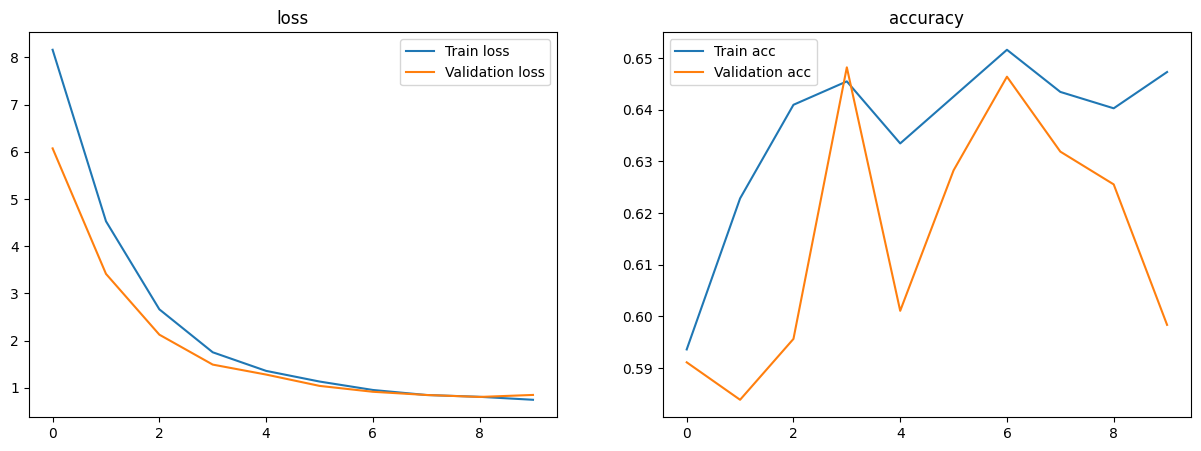

In [20]:
plot_history(history_lstm)

In [ ]:
# Save LSTM  trained model
#model.save("models/LSTMmodel.h5")

In [21]:
# evaluating_06
# Assuming model.predict(X_test) gives probabilities for each class

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred_probs = model.predict(X_test_lstm)

# Convert probabilities to class labels (index of the max probability)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_lstm, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='macro')  # 'macro' averages metrics across all classes
recall = recall_score(y_test_labels, y_pred_labels, average='macro')
f1 = f1_score(y_test_labels, y_pred_labels, average='macro')

# Display results as a table
results = {
        'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)'],
        'Score': [accuracy, precision, recall, f1]
    }

# Create DataFrame for easy display
results_df = pd.DataFrame(results)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print("✅ \nConfusion Matrix:")
print(conf_matrix)
# Create classification report (including precision, recall, f1-score per class)
class_report = classification_report(y_test_labels, y_pred_labels, target_names=['Class 0', 'Class 1', 'Class 2'])
print("✅ \nClassification Report:")
print(class_report)

44/44 [==============================] - 8s 125ms/step
✅ 
Confusion Matrix:
[[411  13  11]
 [ 11  46 411]
 [  3  43 430]]
✅ 
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.94      0.96       435
     Class 1       0.45      0.10      0.16       468
     Class 2       0.50      0.90      0.65       476

    accuracy                           0.64      1379
   macro avg       0.64      0.65      0.59      1379
weighted avg       0.63      0.64      0.58      1379



In [21]:
#predicting_07
X_processed_lstm = encoder_LSTM(X_pred)
y_pred_probs = model.predict(X_processed_lstm)

✅ y_train is not provided, only X_train will be encoded.
1/1 [==============================] - 0s 72ms/step


In [22]:
y_pred_probs

array([[0.05624397, 0.42495462, 0.5188014 ],
       [0.9818726 , 0.01272802, 0.00539934],
       [0.08281998, 0.49621326, 0.42096674],
       [0.02694325, 0.5086313 , 0.4644254 ],
       [0.04104716, 0.4793772 , 0.47957566],
       [0.04720894, 0.45192006, 0.500871  ]], dtype=float32)

# Now, for classes 2 and 3 i want to use RocketClassifier

In [23]:
data_rocket = data[~data['y'].isin([1,4, 5])]

In [26]:
X_rocket = data_rocket.drop(columns = 'y')
y_rocket = data_rocket.y

In [38]:
y_rocket

7        2
12       3
14       2
15       3
16       2
        ..
11491    2
11493    2
11494    3
11495    2
11498    3
Name: y, Length: 4600, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
# Split the data into 70% train and 30% test, with random_state=42 for reproducibility
X_train_rocket, X_test_rocket, y_train_rocket, y_test_rocket = train_test_split(X_rocket,y_rocket, test_size=0.2, random_state=42)

In [44]:
X_train_rocket.shape, X_test_rocket.shape, y_train_rocket.shape, y_test_rocket.shape

((3680, 178), (920, 178), (3680,), (920,))

In [28]:
# Transform X_train needed for sktime
def from_2d_array_to_nested(
    X, index=None, columns=None, time_index=None, cells_as_numpy=False
):
    """Convert 2D dataframe to nested dataframe.

    Convert tabular pandas DataFrame with only primitives in cells into
    nested pandas DataFrame with a single column.

    Parameters
    ----------
    X : pd.DataFrame

    cells_as_numpy : bool, default = False
        If True, then nested cells contain NumPy array
        If False, then nested cells contain pandas Series

    index : array-like, shape=[n_samples], optional (default = None)
        Sample (row) index of transformed DataFrame

    time_index : array-like, shape=[n_obs], optional (default = None)
        Time series index of transformed DataFrame

    Returns
    -------
    Xt : pd.DataFrame
        Transformed DataFrame in nested format
    """
    if (time_index is not None) and cells_as_numpy:
        raise ValueError(
            "`Time_index` cannot be specified when `return_arrays` is True, "
            "time index can only be set to "
            "pandas Series"
        )
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    container = np.array if cells_as_numpy else pd.Series

    # for 2d numpy array, rows represent instances, columns represent time points
    n_instances, n_timepoints = X.shape

    if time_index is None:
        time_index = np.arange(n_timepoints)
    kwargs = {"index": time_index}

    Xt = pd.DataFrame(
        pd.Series([container(X[i, :], **kwargs) for i in range(n_instances)])
    )
    if index is not None:
        Xt.index = index
    if columns is not None:
        Xt.columns = columns
    return Xt



In [45]:
# Convert your X_train to nested format (if it's a 2D array where each row is a time series)
X_train_rocket_nested = from_2d_array_to_nested(X_train_rocket)

In [46]:
# Initialize Binary ROCKET classifier
rocket_binary = RocketClassifier(num_kernels=1000,   #default=10,000
                       rocket_transform='rocket',  #inputs = [“rocket”, “minirocket”, “multirocket”]
                       max_dilations_per_kernel=32,
                       n_features_per_kernel=4,
                       use_multivariate='auto',
                       n_jobs=-1,
                       random_state=None)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rocket_binary,X_train_rocket_nested,y_train_rocket, cv=5)
print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

In [47]:
# fit the Rocket Classifier
rocket_binary.fit(X_train_rocket_nested, y_train_rocket)

RocketClassifier(n_jobs=-1, num_kernels=1000)

In [48]:
# Evaluate the model on test data
X_test_rocket_nested = from_2d_array_to_nested(X_test_rocket)

In [49]:
y_pred = rocket_binary.predict(X_test_rocket_nested)

In [53]:
y_pred.shape

(920,)

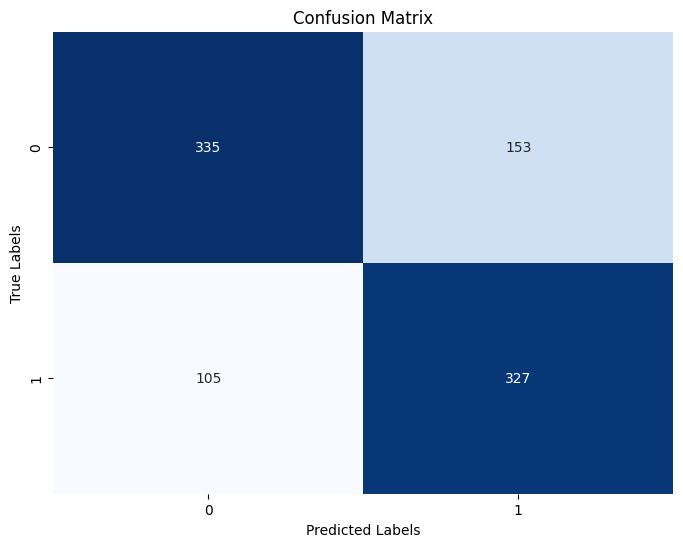

Classification Report:
               precision    recall  f1-score   support

           2       0.76      0.69      0.72       488
           3       0.68      0.76      0.72       432

    accuracy                           0.72       920
   macro avg       0.72      0.72      0.72       920
weighted avg       0.72      0.72      0.72       920



In [55]:
# Create a confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test_rocket, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
class_report = classification_report(y_test_rocket, y_pred)

# Print the classification report
print("Classification Report:\n", class_report)

# Creating a hybrid model of LSTM + RocketBinary

In [57]:
#X_pred = pd.read_csv(X_pred_file_path)
X_lstm = encoder_LSTM(X_pred)

✅ y_train is not provided, only X_train will be encoded.


In [59]:
X_pred

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,-60,-50,-31,-14,5,16,20,17,17,20,...,-22,-24,-24,-24,-16,-13,-13,-20,-29,-34
1,14,6,5,3,-10,-39,-58,-42,-21,-11,...,-2,30,63,89,113,131,150,167,183,198
2,-8,-11,-16,-25,-18,-26,-15,1,41,68,...,-74,-33,0,36,64,89,93,100,95,75
3,-112,-117,-114,-109,-103,-103,-97,-83,-62,-31,...,88,94,94,90,80,66,59,54,46,37
4,-30,-32,-35,-35,-32,-28,-27,-17,-13,-10,...,-16,-26,-38,-51,-67,-74,-79,-81,-90,-95
5,-33,-24,-30,-25,-27,-18,-21,-24,-30,-45,...,-34,-41,-44,-42,-45,-45,-40,-41,-38,-38


In [ ]:
def hybrid_prediction(X_lstm, X_rocket):
    """
    X_lstm -> input data for LSTM
    X_rocket -> input data for ROCKET (only Class 1 & 2)
    """
    # Step 1: Get LSTM predictions
    lstm_probs = lstm_model.predict(X_lstm)  # Assume this gives probabilities
    lstm_preds = np.argmax(lstm_probs, axis=1)

    # Step 2: Identify samples where LSTM predicts Class 1 or 2
    mask = (lstm_preds != 0)  # If LSTM predicts Class 1 or 2, we use ROCKET
    
    # Step 3: Use ROCKET only for Class 1 & 2 cases
    rocket_preds = rocket.predict(X_rocket[mask])

    # Step 4: Replace LSTM predictions with ROCKET predictions for Class 1 & 2
    lstm_preds[mask] = rocket_preds

    return lstm_preds